<a href="https://colab.research.google.com/github/falakchhaya/COVID-19/blob/master/COVID19_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install COVID19Py

  Created wheel for COVID19Py: filename=COVID19Py-0.3.0-cp36-none-any.whl size=4719 sha256=f1e8c47f393b3f8205383d696f701d4131be58ec61e769883c7e1be2b5e5d791
  Stored in directory: /root/.cache/pip/wheels/23/78/50/78aaca989f422d636b01b9c55cd5e327fef838e973690f886c
Successfully built COVID19Py


In [0]:
import COVID19Py

In [0]:
covid = COVID19Py.COVID19()

In [4]:
type(covid)
help(covid)


Help on COVID19 in module COVID19Py.covid19 object:

class COVID19(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, url='https://coronavirus-tracker-api.herokuapp.com', data_source='jhu')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  getAll(self, timelines=False)
 |  
 |  getLatest(self) -> List[Dict[str, int]]
 |      :return: The latest amount of total confirmed cases, deaths, and recoveries.
 |  
 |  getLatestChanges(self)
 |  
 |  getLocationByCountryCode(self, country_code, timelines=False) -> List[Dict]
 |      :param country_code: String denoting the ISO 3166-1 alpha-2 code (https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2) of the country
 |      :param timelines: Whether timeline information should be returned as well.
 |      :return: A list of areas that correspond to the country_code. If the country_code is invalid, it returns an empty list.
 |  
 |  getLocationById(self, country_id:int)
 |      :param country_id: Country I

#Important Summary

Here type(covid) doesn't help much, so help(covid) would come to rescue in case there is no autocomplete available.<br><br>
Now, thanks to auto-complete, there are a few functions that you can use on "covid". Two of the important ones are<br>
(1) get all data (with or without timeline) <br>
(2) get data by country code 
<br>
I've tried these two options below


------ Option - 1 <br>
Trying to get all the data

In [0]:
allData = covid.getAll(timelines=True)

In [6]:
type(allData)

dict

In [7]:
allData.keys()

dict_keys(['latest', 'locations'])

In [8]:
allData.items()
latest = allData['latest']
type(latest)
len(latest)
latest.keys()


dict_keys(['confirmed', 'deaths', 'recovered'])

In [9]:
latest['confirmed'];
latest['deaths']
latest['recovered']


0



# Important Summary
In allData, there are two keys. <br>

'latest' and 'locations'.  <br><br>

'latest' is a dictionary with 3 keys which gives single values of confirmed cases, deaths and recovered cases, that simple.
<br> 

'locations' is a list (length - 264) of dictionary where each element of the list contains complete data of a country/province including latest data and timelines. (it comes right after this block)


In [0]:
locations = allData['locations']

In [11]:
type(locations)

list

In [12]:
len(locations)


264

In [13]:
type(locations[0])

dict

In [14]:
locations[0].keys()

dict_keys(['id', 'country', 'country_code', 'country_population', 'province', 'last_updated', 'coordinates', 'latest', 'timelines'])

In [15]:
# Trying to get the data directly to the Pandas data frame

import pandas as pd

##df = pd.DataFrame.from_dict(locations[0])
df = pd.DataFrame(data=locations)#,index=array)


#df = pd.DataFrame.from_dict(locations[0]) #,orient='index')
print("df.shape is " + str(df.shape))
print("df.keys are " + str(df.keys()))
df.head()
df['timelines'][0]
#df[0][1][6]

#This seems to be the solution. We have to add these columns to the main dataframe and we are sorted ! FPC
# This should work fine for say coordinates but for timelines, we might need to see how exactly is time series data stored normally.
pd.io.json.json_normalize(df['timelines'])

df.shape is (264, 9)
df.keys are Index(['id', 'country', 'country_code', 'country_population', 'province',
       'last_updated', 'coordinates', 'latest', 'timelines'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,confirmed.latest,confirmed.timeline.2020-01-22T00:00:00Z,confirmed.timeline.2020-01-23T00:00:00Z,confirmed.timeline.2020-01-24T00:00:00Z,confirmed.timeline.2020-01-25T00:00:00Z,confirmed.timeline.2020-01-26T00:00:00Z,confirmed.timeline.2020-01-27T00:00:00Z,confirmed.timeline.2020-01-28T00:00:00Z,confirmed.timeline.2020-01-29T00:00:00Z,confirmed.timeline.2020-01-30T00:00:00Z,confirmed.timeline.2020-01-31T00:00:00Z,confirmed.timeline.2020-02-01T00:00:00Z,confirmed.timeline.2020-02-02T00:00:00Z,confirmed.timeline.2020-02-03T00:00:00Z,confirmed.timeline.2020-02-04T00:00:00Z,confirmed.timeline.2020-02-05T00:00:00Z,confirmed.timeline.2020-02-06T00:00:00Z,confirmed.timeline.2020-02-07T00:00:00Z,confirmed.timeline.2020-02-08T00:00:00Z,confirmed.timeline.2020-02-09T00:00:00Z,confirmed.timeline.2020-02-10T00:00:00Z,confirmed.timeline.2020-02-11T00:00:00Z,confirmed.timeline.2020-02-12T00:00:00Z,confirmed.timeline.2020-02-13T00:00:00Z,confirmed.timeline.2020-02-14T00:00:00Z,confirmed.timeline.2020-02-15T00:00:00Z,confirmed.timeline.2020-02-16T00:00:00Z,confirmed.timeline.2020-02-17T00:00:00Z,confirmed.timeline.2020-02-18T00:00:00Z,confirmed.timeline.2020-02-19T00:00:00Z,confirmed.timeline.2020-02-20T00:00:00Z,confirmed.timeline.2020-02-21T00:00:00Z,confirmed.timeline.2020-02-22T00:00:00Z,confirmed.timeline.2020-02-23T00:00:00Z,confirmed.timeline.2020-02-24T00:00:00Z,confirmed.timeline.2020-02-25T00:00:00Z,confirmed.timeline.2020-02-26T00:00:00Z,confirmed.timeline.2020-02-27T00:00:00Z,confirmed.timeline.2020-02-28T00:00:00Z,confirmed.timeline.2020-02-29T00:00:00Z,...,deaths.timeline.2020-03-06T00:00:00Z,deaths.timeline.2020-03-07T00:00:00Z,deaths.timeline.2020-03-08T00:00:00Z,deaths.timeline.2020-03-09T00:00:00Z,deaths.timeline.2020-03-10T00:00:00Z,deaths.timeline.2020-03-11T00:00:00Z,deaths.timeline.2020-03-12T00:00:00Z,deaths.timeline.2020-03-13T00:00:00Z,deaths.timeline.2020-03-14T00:00:00Z,deaths.timeline.2020-03-15T00:00:00Z,deaths.timeline.2020-03-16T00:00:00Z,deaths.timeline.2020-03-17T00:00:00Z,deaths.timeline.2020-03-18T00:00:00Z,deaths.timeline.2020-03-19T00:00:00Z,deaths.timeline.2020-03-20T00:00:00Z,deaths.timeline.2020-03-21T00:00:00Z,deaths.timeline.2020-03-22T00:00:00Z,deaths.timeline.2020-03-23T00:00:00Z,deaths.timeline.2020-03-24T00:00:00Z,deaths.timeline.2020-03-25T00:00:00Z,deaths.timeline.2020-03-26T00:00:00Z,deaths.timeline.2020-03-27T00:00:00Z,deaths.timeline.2020-03-28T00:00:00Z,deaths.timeline.2020-03-29T00:00:00Z,deaths.timeline.2020-03-30T00:00:00Z,deaths.timeline.2020-03-31T00:00:00Z,deaths.timeline.2020-04-01T00:00:00Z,deaths.timeline.2020-04-02T00:00:00Z,deaths.timeline.2020-04-03T00:00:00Z,deaths.timeline.2020-04-04T00:00:00Z,deaths.timeline.2020-04-05T00:00:00Z,deaths.timeline.2020-04-06T00:00:00Z,deaths.timeline.2020-04-07T00:00:00Z,deaths.timeline.2020-04-08T00:00:00Z,deaths.timeline.2020-04-09T00:00:00Z,deaths.timeline.2020-04-10T00:00:00Z,deaths.timeline.2020-04-11T00:00:00Z,deaths.timeline.2020-04-12T00:00:00Z,deaths.timeline.2020-04-13T00:00:00Z,recovered.latest
0,665,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,0
1,467,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,0
2,1983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,0
3,646,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,0
4,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...

In [31]:
# This exercise is kind of independent of the previous block.

n=0 #131 is India
locations[n]['last_updated']

for key in locations[n].keys():
  print(key + " : " + str(locations[n][key]))

print("Next")
len(locations[n]['timelines'])
print("locations keys: ") ; print( locations[n]['timelines'].keys() )
print("timeline - confirmed : " ); print(len(locations[n]['timelines']['confirmed']) )
print("timeline - confirmed - keys :" ) ; print(locations[n]['timelines']['confirmed'].keys())
print("Next2")
print(type(locations[n]['timelines']['confirmed']['latest']))
print(type(locations[n]['timelines']['confirmed']['timeline']))

print("timeline-confirmed-timeline-keys") ; print(locations[n]['timelines']['confirmed']['timeline'].keys())

#for k,v in locations[n]['timelines']['confirmed']['timeline']:
  
timeseries =  pd.DataFrame.from_dict(locations[n]['timelines']['confirmed']['timeline'], orient ='index')


id : 0
country : Afghanistan
country_code : AF
country_population : 29121286
province : 
last_updated : 2020-04-14T20:16:23.391268Z
coordinates : {'latitude': '33.0', 'longitude': '65.0'}
latest : {'confirmed': 665, 'deaths': 21, 'recovered': 0}
timelines : {'confirmed': {'latest': 665, 'timeline': {'2020-01-22T00:00:00Z': 0, '2020-01-23T00:00:00Z': 0, '2020-01-24T00:00:00Z': 0, '2020-01-25T00:00:00Z': 0, '2020-01-26T00:00:00Z': 0, '2020-01-27T00:00:00Z': 0, '2020-01-28T00:00:00Z': 0, '2020-01-29T00:00:00Z': 0, '2020-01-30T00:00:00Z': 0, '2020-01-31T00:00:00Z': 0, '2020-02-01T00:00:00Z': 0, '2020-02-02T00:00:00Z': 0, '2020-02-03T00:00:00Z': 0, '2020-02-04T00:00:00Z': 0, '2020-02-05T00:00:00Z': 0, '2020-02-06T00:00:00Z': 0, '2020-02-07T00:00:00Z': 0, '2020-02-08T00:00:00Z': 0, '2020-02-09T00:00:00Z': 0, '2020-02-10T00:00:00Z': 0, '2020-02-11T00:00:00Z': 0, '2020-02-12T00:00:00Z': 0, '2020-02-13T00:00:00Z': 0, '2020-02-14T00:00:00Z': 0, '2020-02-15T00:00:00Z': 0, '2020-02-16T00:00:00Z': 

In [48]:
#print("Pehla : " + str (timeseries.index))
timeseries.index = pd.to_datetime(timeseries.index)
#print("Pachhi : " + str (timeseries.index))
timeseries.columns = ['confirmedCases']
timeseries.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 83 entries, 2020-01-22 00:00:00+00:00 to 2020-04-13 00:00:00+00:00
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   confirmedCases  83 non-null     int64
dtypes: int64(1)
memory usage: 1.3 KB


In [50]:

print(len(locations[n]['timelines']['confirmed']['timeline']))
print(len(timeseries))

83
83


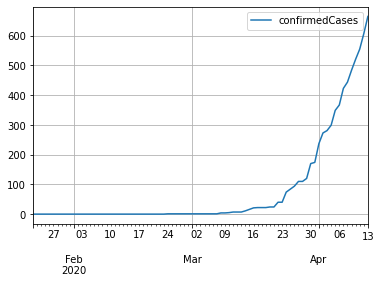

In [53]:
import matplotlib.pyplot as plt
timeseries.plot(grid=True)
plt.show()

In [0]:
#trying to make a list of all the time series together
# FPC we have to see how can we accomodate country code as column names, possibly along with province name if available
for n in range(len(locations)):
  timeseries[n] =  pd.DataFrame.from_dict(locations[n]['timelines']['confirmed']['timeline'], orient ='index')

In [56]:
type(timeseries)

pandas.core.frame.DataFrame

In [67]:
timeseries.info()
#timeseries = timeseries.drop(columns=['confirmedCases'])
#timeseries.tail()
timeseries[131]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 83 entries, 2020-01-22 00:00:00+00:00 to 2020-04-13 00:00:00+00:00
Columns: 264 entries, 0 to 263
dtypes: int64(264)
memory usage: 171.8 KB


2020-01-22 00:00:00+00:00        0
2020-01-23 00:00:00+00:00        0
2020-01-24 00:00:00+00:00        0
2020-01-25 00:00:00+00:00        0
2020-01-26 00:00:00+00:00        0
                             ...  
2020-04-09 00:00:00+00:00     6725
2020-04-10 00:00:00+00:00     7598
2020-04-11 00:00:00+00:00     8446
2020-04-12 00:00:00+00:00     9205
2020-04-13 00:00:00+00:00    10453
Name: 131, Length: 83, dtype: int64

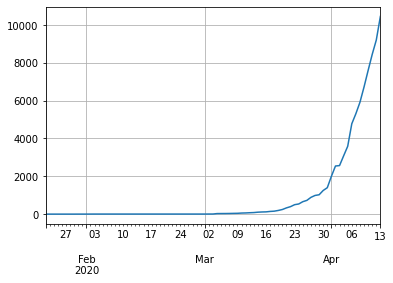

In [68]:
timeseries[131].plot(grid=True)
plt.show()

 ------  Option - 2 <br>  Here we are trying to work on limited data, altervatively

In [0]:
limitedData = covid.getLocationByCountryCode('IN')

In [20]:
type(limitedData)

list

In [21]:
len(limitedData)

1

In [22]:
limitedData


[{'coordinates': {'latitude': '21.0', 'longitude': '78.0'},
  'country': 'India',
  'country_code': 'IN',
  'country_population': 1173108018,
  'id': 131,
  'last_updated': '2020-04-14T20:30:41.290254Z',
  'latest': {'confirmed': 10453, 'deaths': 358, 'recovered': 0},
  'province': ''}]

In [23]:
type(limitedData[0])

len(limitedData[0])

a = limitedData[0]
a.keys()

dict_keys(['id', 'country', 'country_code', 'country_population', 'province', 'last_updated', 'coordinates', 'latest'])

In [24]:
a['latest']

{'confirmed': 10453, 'deaths': 358, 'recovered': 0}

In [25]:
n=0
for item in a.keys():
  #lst[n] = 
  print(str(item) + ' : '+str(a[item]))
  n+=1


id : 131
country : India
country_code : IN
country_population : 1173108018
province : 
last_updated : 2020-04-14T20:30:41.290254Z
coordinates : {'latitude': '21.0', 'longitude': '78.0'}
latest : {'confirmed': 10453, 'deaths': 358, 'recovered': 0}


In [0]:
def extract_text(obj, acc):
  if isinstance(obj, dict):
    for k, v in obj.items():
      if isinstance(v, (dict, list)):
        extract_text(v, acc)
      elif k=="text":
        acc.append(v)
      elif isinstance(obj, list):
        for item in obj:
          extract_text(item, acc)

In [0]:
t1 = []
extract_text(a,t1)

In [28]:
t1

[]